In [21]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import warnings

In [10]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/osptx.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [11]:
# Display top rows
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03 16:00:00,12097.23,12216.76,11955.94,12208.43,162333312
2012-01-04 16:00:00,12189.71,12234.27,12154.04,12226.47,175575328
2012-01-05 16:00:00,12196.24,12253.13,12137.11,12237.40,161562816
2012-01-06 16:00:00,12241.82,12245.99,12148.31,12188.64,144785088
2012-01-09 16:00:00,12194.98,12210.58,12150.68,12196.72,149905296


<AxesSubplot:xlabel='Date'>

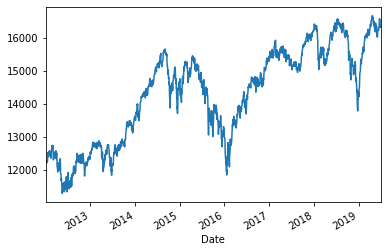

In [12]:
# The series is non-stationary (Trends upwards)
df.Close.plot()

In [13]:
# Transform into a stationary process
df['Return'] = df['Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2012-01-04 16:00:00,12189.71,12234.27,12154.04,12226.47,175575328,0.001478
2012-01-05 16:00:00,12196.24,12253.13,12137.11,12237.40,161562816,0.000894
2012-01-06 16:00:00,12241.82,12245.99,12148.31,12188.64,144785088,-0.003985
2012-01-09 16:00:00,12194.98,12210.58,12150.68,12196.72,149905296,0.000663
2012-01-10 16:00:00,12320.66,12346.82,12198.35,12270.66,188406224,0.006062


In [30]:
df.describe()

,Open,High,Low,Close,Volume,Return
count,1880.000000,1880.000000,1880.00000,1880.000000,1.880000e+03,1880.000000
mean,14288.874638,14341.209521,14228.02967,14286.906096,1.992586e+08,0.000180
std,1416.467054,1409.543142,1422.88844,1415.229883,6.647241e+07,0.006879
min,11310.110000,11344.990000,11209.55000,11280.640000,0.000000e+00,-0.031241
25%,12836.345000,12886.690000,12794.65750,12838.427500,1.609650e+08,-0.003341
50%,14596.675000,14662.845000,14532.24000,14600.030000,1.896139e+08,0.000621
75%,15424.807500,15470.587500,15364.11750,15408.615000,2.243834e+08,0.004242
max,16642.120000,16672.710000,16589.78000,16669.400000,8.588881e+08,0.029389


In [14]:
# Select only the returns
returns = df.loc[:, 'Return']
returns.head(2)

Date
2012-01-04 16:00:00    0.001478
2012-01-05 16:00:00    0.000894
Name: Return, dtype: float64

<AxesSubplot:xlabel='Date'>

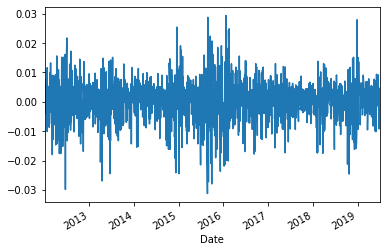

In [15]:
# Stationarity now seen
returns.plot()

# ARMA Model

In [26]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [35]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(1,1))

/Users/kumarisurbhi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [33]:
# Fit the model to the data
results = model.fit()

<AxesSubplot:title={'center':'Stock Return Forecast'}>

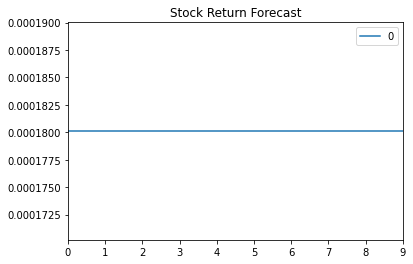

In [34]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast")

In [31]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1880
Model:                     ARMA(1, 1)   Log Likelihood                6700.067
Method:                       css-mle   S.D. of innovations              0.007
Date:                Sun, 18 Apr 2021   AIC                         -13392.134
Time:                        09:43:28   BIC                         -13369.978
Sample:                             0   HQIC                        -13383.973
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.064      0.288      -0.000       0.001
ar.L1.y       -0.1059      0.278     -0.381      0.703      -0.650       0.439
ma.L1.y        0.1861      0.275      0.678      0.498      -0.352       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.4422           +0.0000j            9.4422            0.5000
MA.1           -5.3744           +0.0000j            5.3744            0.5000
-----------------------------------------------------------------------------
"""